In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.integrate import odeint

In [2]:
# Initial condition
q0 = 0.5
p0 = 0.

# Total time interval (start from t = 0)
T = 10

# time step
t_step = 0.2
n_steps = int(T/t_step)

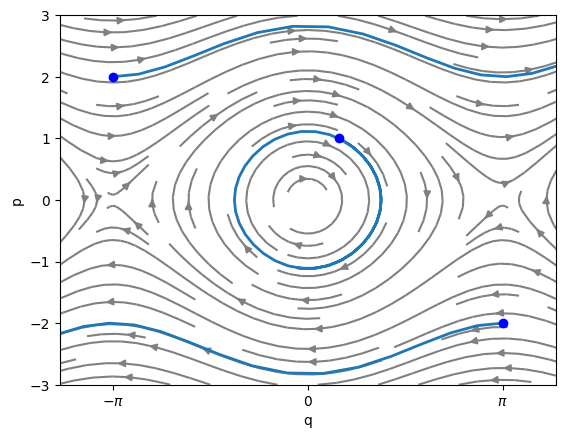

In [3]:
# Vector field

q, p = np.meshgrid(np.arange(-1.5*np.pi,1.5*np.pi,0.01), np.arange(-3,3,0.01))

dq = p
dp = -np.sin(q)

def f(y, t):
  q_,p_ = y
  dydt = [p_, -np.sin(q_)]
  return dydt

t = np.linspace(0, T, n_steps)
q0_ = [0.5, -np.pi, np.pi]
p0_ = [1, 2, -2]

plt.figure()
streamplot(q,p,dq,dp, color='gray')
for i in range(3):
  y0 = [q0_[i], p0_[i]]
  ys = odeint(f, y0, t)
  plt.plot(ys[:,0], ys[:,1], linestyle='solid', linewidth=2, color='tab:blue') # trajectory
  plt.plot([ys[0,0]], [ys[0,1]], 'bo') # initial value
plt.xlabel('q')
plt.ylabel('p')
plt.yticks(np.arange(-3,4,1))
plt.xticks([-np.pi, 0, np.pi], [r'$-\pi$', 0, r'$\pi$'])
plt.ylim(-3,3)
plt.xlim(-4,4)
show()

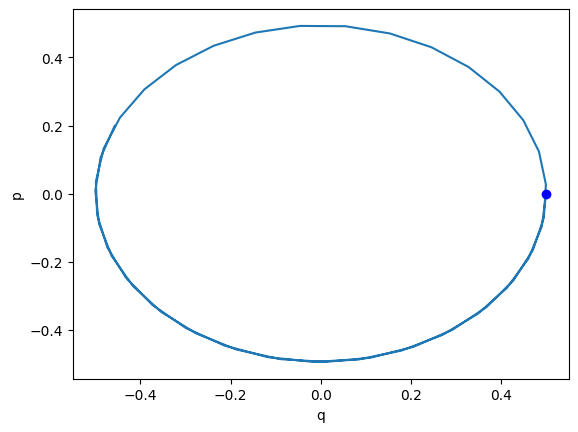

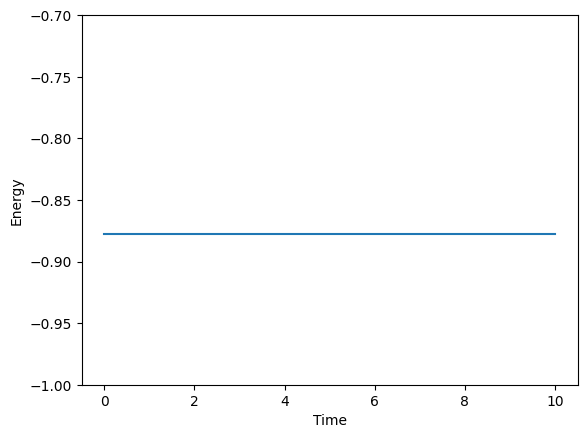

In [4]:
t = np.linspace(0, T, n_steps)
y0 = [q0, p0]

def f(y, t):
  q_,p_ = y
  dydt = [p_, -np.sin(q_)]
  return dydt

ys = odeint(f, y0, t)


plt.figure()
plt.plot(ys[:,0], ys[:,1], linestyle='solid', color='tab:blue') # trajectory
plt.plot([ys[0,0]], [ys[0,1]], 'bo') # initial value
plt.xlabel('q')
plt.ylabel('p')
plt.show()


energies = np.zeros(n_steps)
for i in range(n_steps):
  energies[i] = 0.5*ys[i,1]*ys[i,1] - np.cos(ys[i,0])

plt.figure()
plt.plot(t, energies)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.ylim(-1, -0.7)
plt.show()


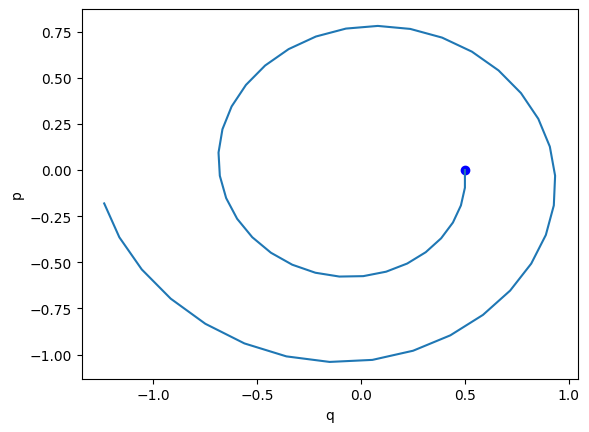

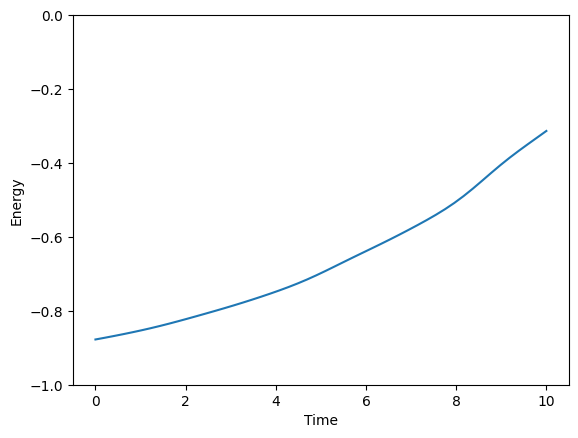

In [5]:
# Explicit Euler
q_eE = np.zeros(n_steps)
p_eE = np.zeros(n_steps)

q_eE[0] = q0
p_eE[0] = p0

for n in range(0, n_steps-1):
  q_eE[n+1] = q_eE[n] + t_step * p_eE[n]
  p_eE[n+1] = p_eE[n] + t_step * (-np.sin(q_eE[n]))


plt.figure()
plt.plot(q0,p0,'bo')
plt.plot(q_eE, p_eE)

plt.xlabel('q')
plt.ylabel('p')
plt.show()

energies = np.zeros(n_steps)
for i in range(n_steps):
  energies[i] = 0.5*p_eE[i]*p_eE[i] - np.cos(q_eE[i])

plt.figure()
plt.plot(t, energies)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.ylim(-1,0)
plt.show()

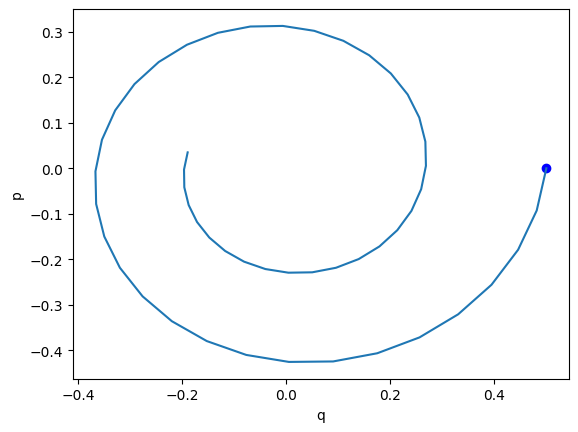

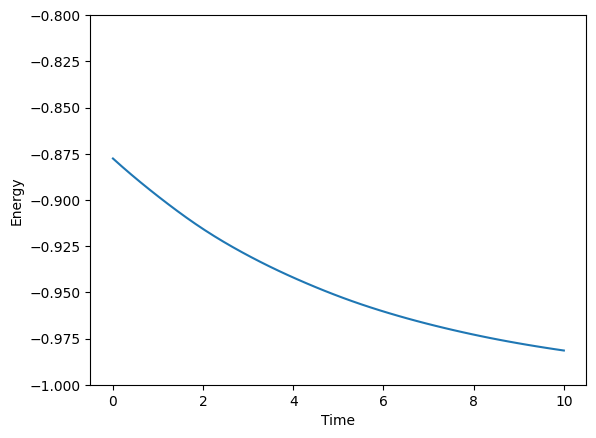

In [6]:
# Implicit Euler
q_iE = np.zeros(n_steps)
p_iE = np.zeros(n_steps)

q_iE[0] = q0
p_iE[0] = p0

eps = 1e-8
max_iter = 50
flag = False
for n in range(0, n_steps-1):
  # First approximation: explicit Euler
  q_approx = q_iE[n] + t_step * p_iE[n]
  p_approx = p_iE[n] + t_step * (-np.sin(q_iE[n]))
  error = abs(q_approx - q_iE[n]) + abs(p_approx - p_iE[n])
  iter = 0
  while (error > eps):
    q_iter = q_iE[n] + t_step * p_approx
    p_iter = p_iE[n] + t_step * (-np.sin(q_approx))

    error = abs(q_iter - q_approx) + abs(p_iter - p_approx)
    q_approx = q_iter
    p_approx = p_iter
    iter += 1

    if (iter > max_iter):
      flag = True
      break

  if flag:
    print(f'n = {n} did not converge')
    break

  q_iE[n+1] = q_iter
  p_iE[n+1] = p_iter

plt.figure()
plt.plot(q0,p0,'bo')
plt.plot(q_iE, p_iE)

plt.xlabel('q')
plt.ylabel('p')
plt.show()

energies = np.zeros(n_steps)
for i in range(n_steps):
  energies[i] = 0.5*p_iE[i]*p_iE[i] - np.cos(q_iE[i])

plt.figure()
plt.plot(t, energies)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.ylim(-1,-0.8)
plt.show()

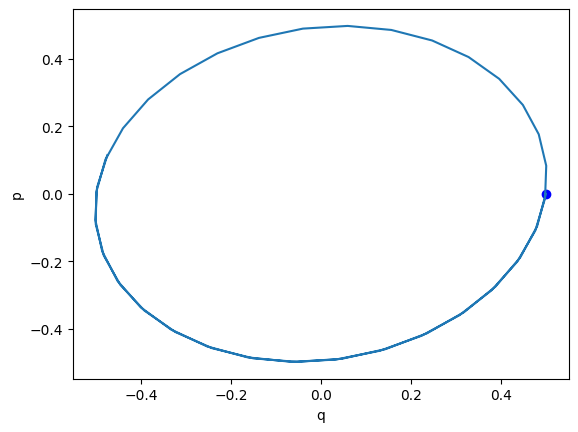

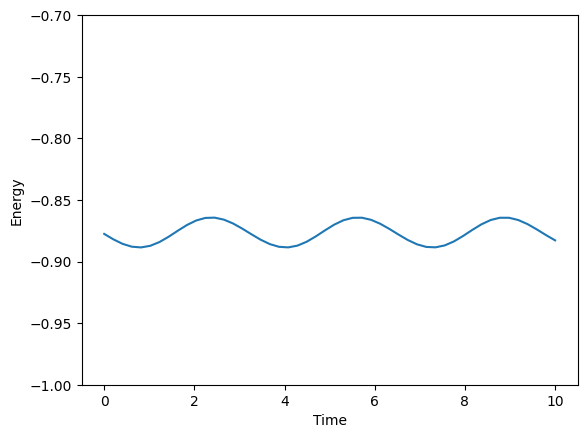

In [7]:
# Symplectic Euler 1
q_sE1 = np.zeros(n_steps)
p_sE1 = np.zeros(n_steps)

q_sE1[0] = q0
p_sE1[0] = p0

for n in range(0, n_steps-1):
  p_sE1[n+1] = p_sE1[n] + t_step * (-np.sin(q_sE1[n]))
  q_sE1[n+1] = q_sE1[n] + t_step * p_sE1[n+1]

plt.figure()
plt.plot(q0,p0,'bo')
plt.plot(q_sE1, p_sE1)
plt.xlabel('q')
plt.ylabel('p')
plt.show()

energies = np.zeros(n_steps)
for i in range(n_steps):
  energies[i] = 0.5*p_sE1[i]*p_sE1[i] - np.cos(q_sE1[i])

plt.figure()
plt.plot(t, energies)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.ylim(-1,-0.7)
plt.show()

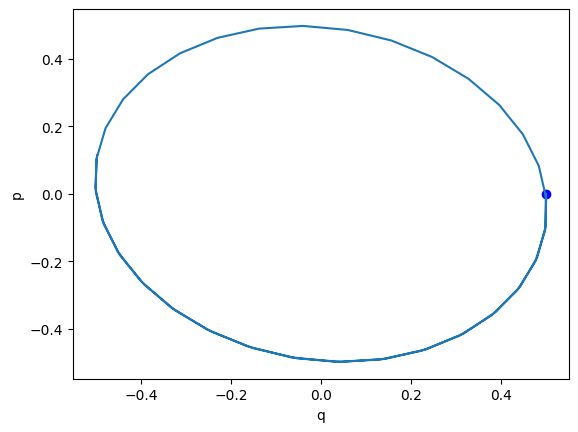

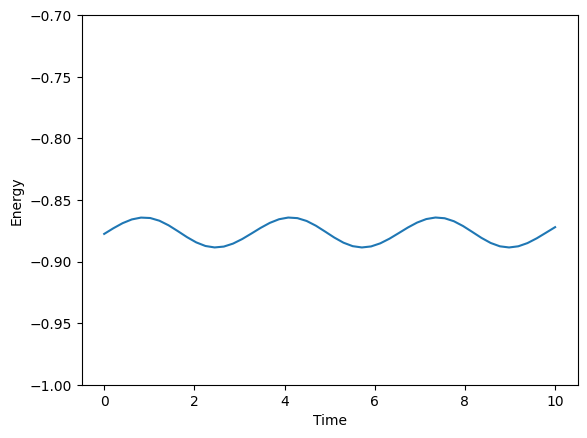

In [8]:
# Symplectic Euler 2
q_sE2 = np.zeros(n_steps)
p_sE2 = np.zeros(n_steps)

q_sE2[0] = q0
p_sE2[0] = p0

for n in range(0, n_steps-1):
  q_sE2[n+1] = q_sE2[n] + t_step * p_sE2[n]
  p_sE2[n+1] = p_sE2[n] + t_step * (-np.sin(q_sE2[n+1]))


plt.figure()
plt.plot(q0,p0,'bo')
plt.plot(q_sE2, p_sE2)
plt.xlabel('q')
plt.ylabel('p')
plt.show()

energies = np.zeros(n_steps)
for i in range(n_steps):
  energies[i] = 0.5*p_sE2[i]*p_sE2[i] - np.cos(q_sE2[i])

plt.figure()
plt.plot(t, energies)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.ylim(-1,-0.7)
plt.show()